Learning to use pytorch. Based on the tutorial from https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Uncomment this to use GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

# Uncomment this to use CPU
# device = 'cpu'

cpu


In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 100

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100.0%


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


torch.Size([100, 3, 32, 32])


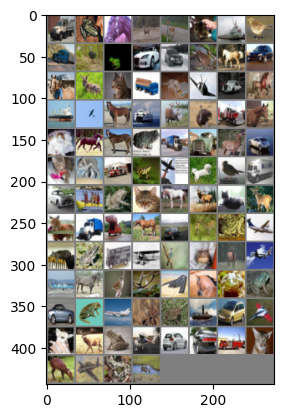

truck frog  horse deer  deer  cat   ship  bird  truck bird  frog  car   car   frog  horse car   horse deer  cat   truck dog   plane car   horse ship  plane horse ship  deer  bird  truck horse cat   horse horse frog  truck truck deer  car   cat   cat   truck frog  plane dog   bird  truck car   ship  frog  cat   horse deer  cat   deer  horse truck truck horse car   deer  frog  plane cat   frog  truck plane bird  frog  deer  plane plane horse bird  deer  plane horse frog  frog  car   frog  plane bird  frog  ship  car   plane dog   deer  frog  plane car   car   truck cat   deer  plane frog  deer 


In [3]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [4]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5) # output size of Bx6x28x28
        self.pool = nn.MaxPool2d(2, 2) # output size of Bx6x0.5x0.5
        self.conv2 = nn.Conv2d(6, 16, 5) # Bx16x10x10
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
net = net.to(device)

In [5]:
# Alternate network from the tutorial at https://shonit2096.medium.com/cnn-on-cifar10-data-set-using-pytorch-34be87e09844

class BetterNet(nn.Module):
    def __init__(self):
        super(BetterNet, self).__init__()
        # convolutional layer
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # fully connected layers
        self.fc1 = nn.Linear(64 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 64)
        self.fc3 = nn.Linear(64, 10)
        # dropout
        self.dropout = nn.Dropout(p=.5)

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        # flattening
        x = x.view(-1, 64 * 4 * 4)
        # fully connected layers
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x

net = BetterNet()
net = net.to(device)

In [6]:
criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adamax(net.parameters(), lr=0.005)

In [7]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        # inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,   100] loss: 2.102
[1,   200] loss: 1.796
[1,   300] loss: 1.672
[1,   400] loss: 1.587
[1,   500] loss: 1.494
[2,   100] loss: 1.432
[2,   200] loss: 1.391
[2,   300] loss: 1.358
[2,   400] loss: 1.319
[2,   500] loss: 1.305
[3,   100] loss: 1.241
[3,   200] loss: 1.208
[3,   300] loss: 1.183
[3,   400] loss: 1.162
[3,   500] loss: 1.132
[4,   100] loss: 1.091
[4,   200] loss: 1.075
[4,   300] loss: 1.049
[4,   400] loss: 1.054
[4,   500] loss: 1.048
[5,   100] loss: 0.999
[5,   200] loss: 0.973
[5,   300] loss: 0.981
[5,   400] loss: 0.967
[5,   500] loss: 0.975
[6,   100] loss: 0.920
[6,   200] loss: 0.911
[6,   300] loss: 0.912
[6,   400] loss: 0.898
[6,   500] loss: 0.897
[7,   100] loss: 0.852
[7,   200] loss: 0.857
[7,   300] loss: 0.855
[7,   400] loss: 0.842
[7,   500] loss: 0.860
[8,   100] loss: 0.814
[8,   200] loss: 0.803
[8,   300] loss: 0.818
[8,   400] loss: 0.771
[8,   500] loss: 0.800
[9,   100] loss: 0.757
[9,   200] loss: 0.748
[9,   300] loss: 0.773
[9,   400] 

In [8]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

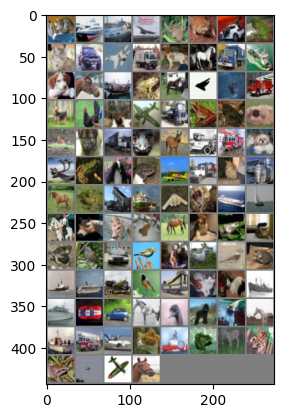

GroundTruth:  cat   ship  ship  plane
Predicted:  dog   ship  ship  plane


In [9]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images and the ground truth
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))


# Load the network from disk and run it on a single batch of the test images.
# net = Net()
# net.load_state_dict(torch.load(PATH))
outputs = net(images.to(device))

# Output the predicted labels
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

In [10]:
# Get the statistical prediction results for the whole test set
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images.to(device))
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted.to('cpu') == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 69 %


In [11]:
# Get the statistical prediction results for each category individually for the whole test set
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.to(device))
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions.to('cpu')):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')



Accuracy for class: plane is 73.8 %
Accuracy for class: car   is 71.1 %
Accuracy for class: bird  is 53.1 %
Accuracy for class: cat   is 56.4 %
Accuracy for class: deer  is 66.9 %
Accuracy for class: dog   is 58.0 %
Accuracy for class: frog  is 77.8 %
Accuracy for class: horse is 75.1 %
Accuracy for class: ship  is 84.4 %
Accuracy for class: truck is 84.4 %


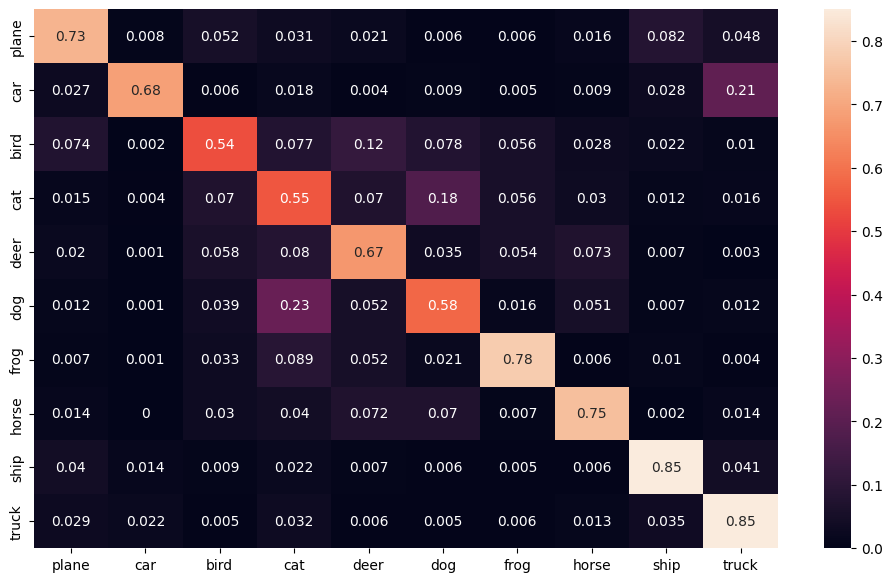

In [12]:
# build a confusion matrix (based on tutorial from https://christianbernecker.medium.com/how-to-create-a-confusion-matrix-in-pytorch-38d06a7f04b7)
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []

with torch.no_grad():
    for images, labels in testloader:

        outputs = net(images.to(device))
        _, predictions = torch.max(outputs, 1)
        y_pred.extend(predictions.to('cpu'))

        y_true.extend(labels)

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')